In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
vehicle = pd.read_csv("vehicle.csv")

In [3]:
vehicle.head(5)
vehicle.shape

(846, 19)

In [4]:
vehicle.dtypes


compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
#filling all null values with their mean 
vehicle.fillna(vehicle.mean(), inplace=True)

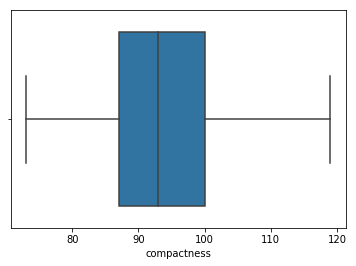

In [7]:
sns.boxplot(x= vehicle['compactness'])

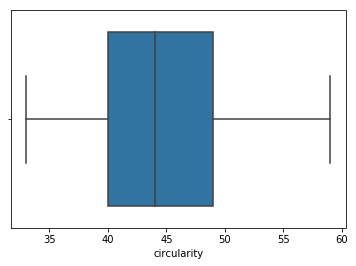

In [24]:
sns.boxplot(x= vehicle['circularity'])

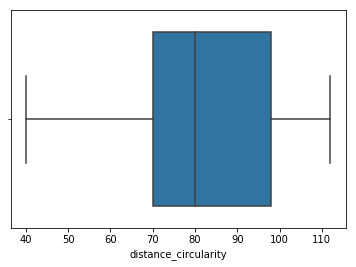

In [25]:
sns.boxplot(x= vehicle['distance_circularity'])

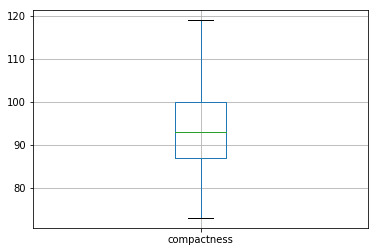

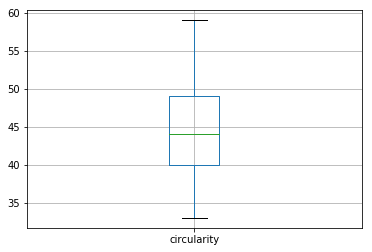

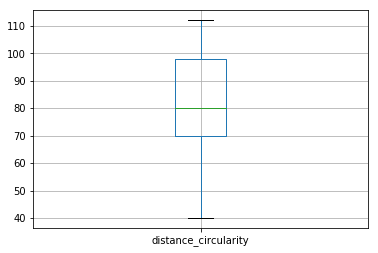

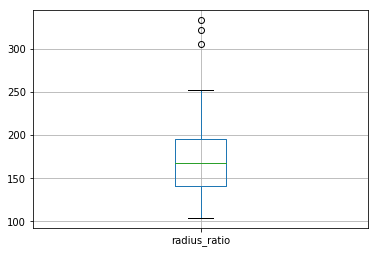

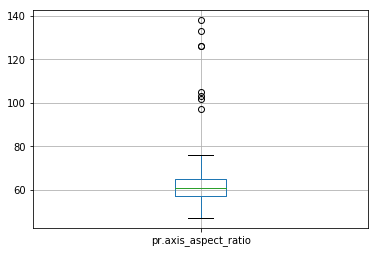

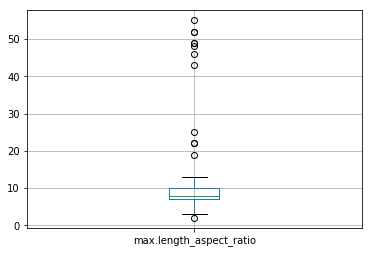

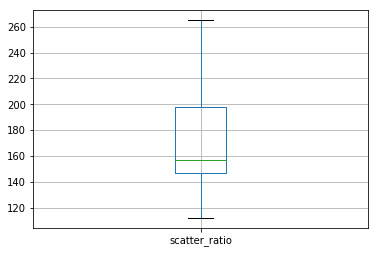

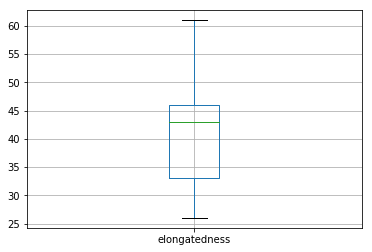

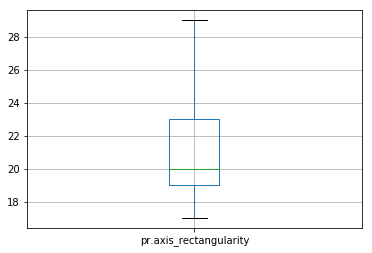

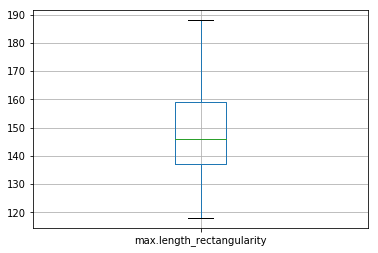

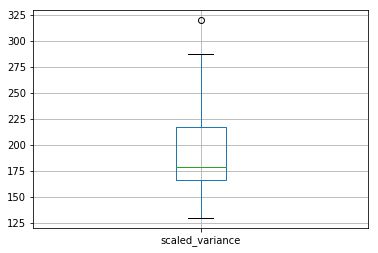

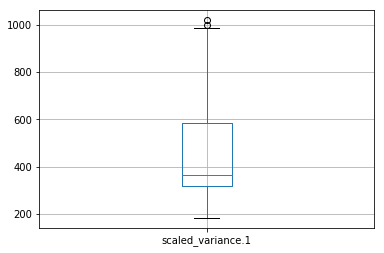

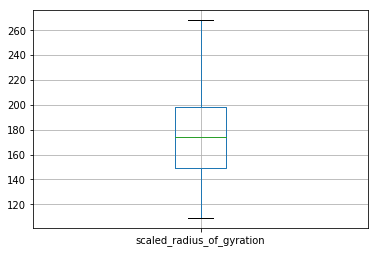

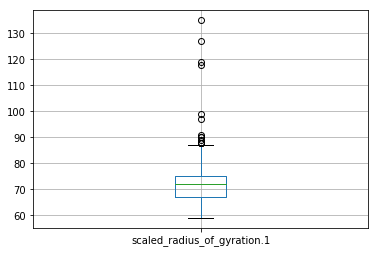

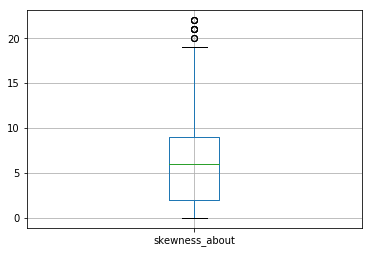

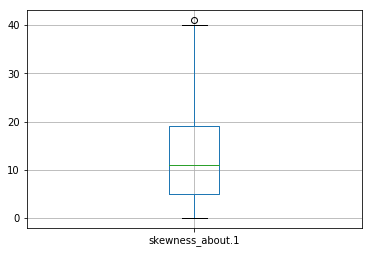

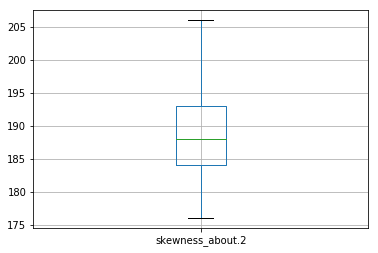

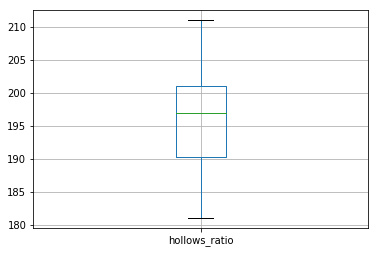

In [26]:
vhc = vehicle.drop(columns= 'class')
for column in vhc:
    plt.figure()
    vehicle.boxplot([column])


The columns with major outliers are : 

radius_ratio, 
axis_aspect_ratio,
length_aspect_ratio,
scaled_radius_of_gyration,
skewnessabout,

In [8]:
vehicle.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0    178.000000   
1           91    41.000000                  84.0    141.000000   
2          104    50.000000                 106.0    209.000000   
3           93    41.000000                  82.0    159.000000   
4           85    44.000000                  70.0    205.000000   
5          107    44.828775                 106.0    172.000000   
6           97    43.000000                  73.0    173.000000   
7           90    43.000000                  66.0    157.000000   
8           86    34.000000                  62.0    140.000000   
9           93    44.000000                  98.0    168.888095   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [9]:
vehicle['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [10]:
#Outlier treatment
Q1 = vehicle.quantile(0.25)
Q3 = vehicle.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [11]:
vehicle_out = vehicle[~((vehicle < (Q1 - 1.5 * IQR)) |(vehicle > (Q3 + 1.5 * IQR))).any(axis=1)]
vehicle_out.shape

(813, 19)

In [12]:
vehicle.shape

(846, 19)

In [13]:
#I have removed all the outliers

In [14]:

vehicle_out.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.679901              0.786810   
circularity                     0.679901     1.000000              0.787513   
distance_circularity            0.786810     0.787513              1.000000   
radius_ratio                    0.746091     0.641013              0.808392   
pr.axis_aspect_ratio            0.200887     0.205616              0.245423   
max.length_aspect_ratio         0.497660     0.563732              0.668662   
scatter_ratio                   0.810430     0.844049              0.904856   
elongatedness                  -0.788449    -0.816212             -0.908822   
pr.axis_rectangularity          0.811810     0.841827              0.894892   
max.length_rectangularity       0.674166     0.961873              0.768843   
scaled_variance                 0.792230     0.803324              0.884633   
scaled_variance.1               0.814537     0.835218              0.889593   
scaled_radius_of_gyration       0.577596     0.926273              0.702683   
scaled_radius_of_gyration.1    -0.254274     0.067633             -0.237766   
skewness_about                  0.200199     0.140639              0.098711   
skewness_about.1                0.161505    -0.014774              0.263514   
skewness_about.2                0.295404    -0.118122              0.128336   
hollows_ratio                   0.364160     0.038081              0.320969   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.746091              0.200887   
circularity                      0.641013              0.205616   
distance_circularity             0.808392              0.245423   
radius_ratio                     1.000000              0.666403   
pr.axis_aspect_ratio             0.666403              1.000000   
max.length_aspect_ratio          0.460737              0.138243   
scatter_ratio                    0.789305              0.199988   
elongatedness                   -0.844374             -0.302280   
pr.axis_rectangularity           0.763736              0.169522   
max.length_rectangularity        0.577067              0.146175   
scaled_variance                  0.793528              0.215642   
scaled_variance.1                0.778087              0.187041   
scaled_radius_of_gyration        0.550726              0.153722   
scaled_radius_of_gyration.1     -0.403672             -0.325331   
skewness_about                   0.040348             -0.051643   
skewness_about.1                 0.187295             -0.028793   
skewness_about.2                 0.418257              0.406247   
hollows_ratio                    0.504630              0.419789   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.497660       0.810430   
circularity                                 0.563732       0.844049   
distance_circularity                        0.668662       0.904856   
radius_ratio                                0.460737       0.789305   
pr.axis_aspect_ratio                        0.138243       0.199988   
max.length_aspect_ratio                     1.000000       0.497043   
scatter_ratio                               0.497043       1.000000   
elongatedness                              -0.502220      -0.971404   
pr.axis_rectangularity                      0.497641       0.989034   
max.length_rectangularity                   0.647844       0.806303   
scaled_variance                             0.411749       0.977143   
scaled_variance.1                           0.459248       0.993807   
scaled_radius_of_gyration                   0.404216       0.794274   
scaled_radius_of_gyration.1                -0.333074       0.001917   
skewness_about                              0.083734       0.063319   
skewness_about.1                            0.141178       0.214919   
skewness_about.2                            0.

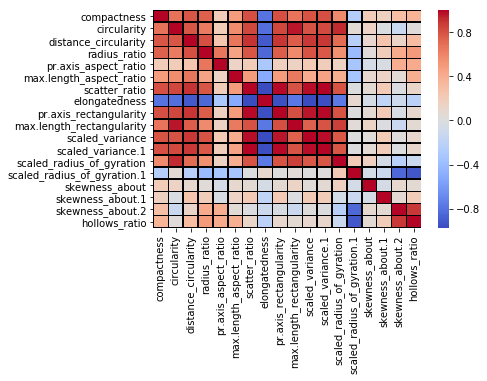

In [15]:
data = vehicle_out.drop(columns='class')
ax = sns.heatmap(data.corr(), linewidths=.5,cmap= 'coolwarm', linecolor='black')

In [16]:
#There is high correlation among the different independent parameters - 
#elongatedness seems to be an important parameter as it has negative correlation with most of the parameters.
#

In [17]:
X=data
y=vehicle_out['class']




[0.02913882 0.04070929 0.05104559 0.04408232 0.05607401 0.10166051
 0.07450504 0.05925044 0.08870349 0.07486428 0.07550231 0.08014445
 0.03728779 0.06620363 0.01894441 0.01619229 0.03268592 0.05300541]


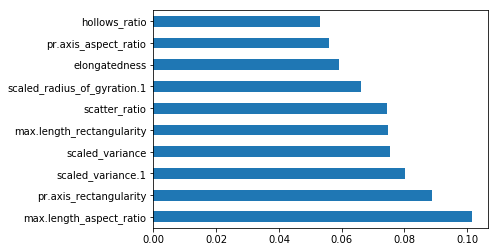

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs         Score
11          scaled_variance.1  12065.210010
6               scatter_ratio   1197.619758
3                radius_ratio   1059.702931
10            scaled_variance    909.655291
2        distance_circularity    472.193179
15           skewness_about.1    440.613910
12  scaled_radius_of_gyration    424.796553
7               elongatedness    311.514438
5     max.length_aspect_ratio    102.250674
14             skewness_about     84.305144


In [20]:
# The above parameters are important independent features. 

In [21]:
sc=StandardScaler()
X_std = sc.fit_transform(X)
X_std.shape

(813, 18)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.2, random_state = 10)

In [23]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00123153e+00  6.80738158e-01  7.87779382e-01  7.47010142e-01
   2.01134045e-01  4.98273207e-01  8.11428060e-01 -7.89419844e-01
   8.12809575e-01  6.74996601e-01  7.93205851e-01  8.15539890e-01
   5.78307463e-01 -2.54587444e-01  2.00445936e-01  1.61703424e-01
   2.95768019e-01  3.64608943e-01]
 [ 6.80738158e-01  1.00123153e+00  7.88482552e-01  6.41802922e-01
   2.05869594e-01  5.64425955e-01  8.45088231e-01 -8.17216743e-01
   8.42863411e-01  9.63058072e-01  8.04313451e-01  8.36247004e-01
   9.27413698e-01  6.77165404e-02  1.40812217e-01 -1.47926174e-02
  -1.18267550e-01  3.81278887e-02]
 [ 7.87779382e-01  7.88482552e-01  1.00123153e+00  8.09387298e-01
   2.45725559e-01  6.69485590e-01  9.05970845e-01 -9.09941456e-01
   8.95994217e-01  7.69789847e-01  8.85722587e-01  8.90688925e-01
   7.03548759e-01 -2.38059120e-01  9.88321703e-02  2.63838496e-01
   1.28493822e-01  3.21364560e-01]
 [ 7.47010142e-01  6.41802922e-01  8.09387298e-01  1.00123153e+00
   6.67223966e-

In [24]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(" Variance Explained", var_exp)
print("Cumulative Variance Explained", cum_var_exp)

 Variance Explained [54.361092440011525, 18.745730718543875, 6.708787722782647, 6.307271306283322, 4.971206017498453, 3.650138384313031, 1.7900417511063762, 1.2571062986293369, 0.6218813976413256, 0.42200658296486177, 0.34394927255797597, 0.24033801032165952, 0.16350237673637566, 0.14643319709393435, 0.10695443416833605, 0.09405004931102522, 0.05175835669869529, 0.017751683337219548]
Cumulative Variance Explained [ 54.36109244  73.10682316  79.81561088  86.12288219  91.09408821
  94.74422659  96.53426834  97.79137464  98.41325604  98.83526262
  99.17921189  99.4195499   99.58305228  99.72948548  99.83643991
  99.93048996  99.98224832 100.        ]


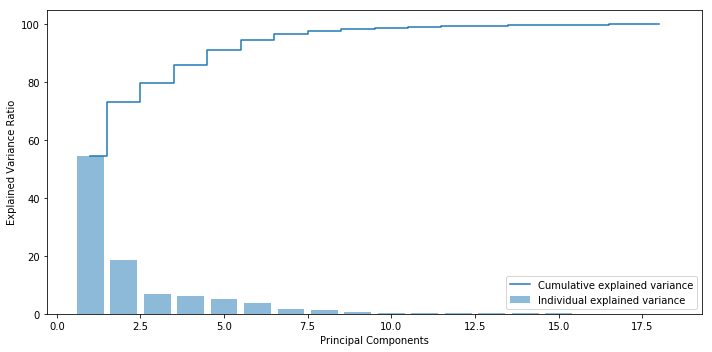

In [25]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [26]:
data.shape

(813, 18)

In [27]:
X_std.shape

(813, 18)

In [28]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)

In [29]:
eigen_pairs

[(9.797047127673991,
  array([-0.27222643, -0.2854862 , -0.30142449, -0.27258836, -0.0985978 ,
         -0.19469421, -0.31028635,  0.30834277, -0.30754394, -0.27625762,
         -0.30279301, -0.30743531, -0.26147289,  0.04373715, -0.03657989,
         -0.05896075, -0.03471251, -0.08274638])),
 (3.3783869868863405,
  array([-0.08981662,  0.1338806 , -0.04376442, -0.20420454, -0.25901943,
         -0.09451451,  0.07224379, -0.01161517,  0.08418285,  0.12578009,
          0.06966463,  0.07741706,  0.20996729,  0.50394436, -0.01443018,
         -0.09344453, -0.5017323 , -0.50649825])),
 (1.209068959793118,
  array([ 0.02225834,  0.21081277, -0.07075372, -0.03917597,  0.1165428 ,
          0.13827241, -0.11316039,  0.09027478, -0.11080192,  0.21958436,
         -0.14510475, -0.11458812,  0.21377238, -0.06711504,  0.52101461,
         -0.68772545,  0.06246752,  0.04071189])),
 (1.13670699872106,
  array([ 0.13036553, -0.02009916,  0.10714118, -0.2529595 , -0.60503868,
          0.32292373, -

In [30]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs[index][0] for index in range(len(e_vals))]
eigvectors_sort = [eigen_pairs[index][1] for index in range(len(e_vecs))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[9.797047127673991, 3.3783869868863405, 1.209068959793118, 1.13670699872106, 0.8959190746314323, 0.6578340531531632, 0.3226043224838755, 0.2265578026372131, 0.11207650705767429, 0.07605473319098253, 0.06198711397307163, 0.043314118756738455, 0.029466672181774876, 0.026390436037840317, 0.019275507261323013, 0.01694985740908303, 0.009327977733112147, 0.0031992381029171263]


Because variance explained is :


 Variance Explained [54.361092440011525, 18.745730718543875, 6.708787722782647, 6.307271306283322, 4.971206017498453, 3.650138384313031, 1.7900417511063762, 1.2571062986293369, 0.6218813976413256, 0.42200658296486177, 0.34394927255797597, 0.24033801032165952, 0.16350237673637566, 0.14643319709393435, 0.10695443416833605, 0.09405004931102522, 0.05175835669869529, 0.017751683337219548]
 
 
 
Cumulative Variance Explained [ 54.36109244  73.10682316  79.81561088  86.12288219  91.09408821
  94.74422659  96.53426834  97.79137464  98.41325604  98.83526262
  99.17921189  99.4195499   99.58305228  99.72948548  99.83643991
  99.93048996  99.98224832 100.        ]

Total no of features which explain 95 percent variance are 7 features :
   
   
   Cumulative Variance Explained [ 54.36109244 73.10682316 79.81561088 86.12288219 91.09408821 94.74422659 96.53426834 ]
    

In [31]:
P_reduce = np.array(eigvectors_sort[0:7]).transpose()

In [32]:
Proj_data_D = np.dot(X_std,P_reduce)
type(Proj_data_D)
Proj_data_D.shape

(813, 7)

In [33]:
#now we have 7 independent columns 

In [34]:
X_train, X_test, y_train, y_test = train_test_split( 
                         Proj_data_D,y,
                test_size = 0.20, random_state = 101) 

In [46]:
# train the model on train set 
model_rbf = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale') 
model_rbf.fit(X_train, y_train) 
  
# print prediction results 
predictions = model_rbf.predict(X_test) 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

         bus       0.93      1.00      0.97        43
         car       0.96      0.94      0.95        80
         van       0.92      0.90      0.91        40

   micro avg       0.94      0.94      0.94       163
   macro avg       0.94      0.95      0.94       163
weighted avg       0.95      0.94      0.94       163



In [43]:
# train the model on train set 
model_auto= SVC() 
model_auto.fit(X_train, y_train) 
  



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
# train the model on train set 
model = SVC(C=1.0, kernel='linear', degree=3, gamma='scale') 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         bus       0.75      0.93      0.83        43
         car       0.93      0.85      0.89        80
         van       0.92      0.85      0.88        40

   micro avg       0.87      0.87      0.87       163
   macro avg       0.87      0.88      0.87       163
weighted avg       0.88      0.87      0.87       163



In [38]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.01, 0.05, 0.5, 1],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.5185185185185185, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.5185185185185185, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.5185185185185185, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5161290322580645, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.5185185185185185, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, ker

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [39]:
# C=10, gamma=0.1, kernel=rbf, score=0.9400921658986175

model_grid = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
model_grid.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         bus       0.75      0.93      0.83        43
         car       0.93      0.85      0.89        80
         van       0.92      0.85      0.88        40

   micro avg       0.87      0.87      0.87       163
   macro avg       0.87      0.88      0.87       163
weighted avg       0.88      0.87      0.87       163



In [44]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(model_auto, X, y, cv=5)
scores

array([0.51219512, 0.51533742, 0.51533742, 0.51234568, 0.51552795])

In [45]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(model_grid, X, y, cv=5)
scores

array([0.51219512, 0.51533742, 0.51533742, 0.51234568, 0.51552795])

In [51]:
scores = cross_val_score(model_rbf, X, y, cv=10)
scores

array([0.62195122, 0.67073171, 0.69512195, 0.67073171, 0.67073171,
       0.75609756, 0.69135802, 0.59259259, 0.6875    , 0.70886076])

In [48]:
model_best_hyp = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 
model_best_hyp.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
scores_best_hyp = cross_val_score(model_best_hyp, X, y, cv=10)
scores_best_hyp

array([0.51219512, 0.51219512, 0.52439024, 0.51219512, 0.51219512,
       0.52439024, 0.50617284, 0.50617284, 0.5125    , 0.51898734])